# Experimenting with the Nyquist limit

## Frequency sweep from 0 - 22,050Hz

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt 
import numpy as np 
import scipy as sp # for signal processing
from scipy import signal
import random
import scipy.io.wavfile

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving signalpro.py to signalpro.py


{'signalpro.py': b'import matplotlib.pyplot as plt # matplot lib is the premiere plotting lib for Python: https://matplotlib.org/\r\nimport numpy as np # numpy is the premiere signal handling library for Python: http://www.numpy.org/\r\nimport scipy as sp # for signal processing\r\nfrom scipy import signal\r\nfrom scipy.spatial import distance\r\nimport librosa\r\nimport random\r\n\r\n### SINE AND COSINE GENERATOR FUNCTIONS ###\r\n\r\ndef create_sine_waves(freqs, sampling_rate, total_time_in_secs = None, return_time = False):\r\n    \'\'\'Creates multiple sine waves corresponding to the freq array, sampling rate, and length\r\n    \r\n       Returns a tuple list of (freq, sine_wave) or (freq, (time, sine_wave))\r\n       depending on whether return_time is True or False\r\n    \'\'\'\r\n    sine_waves = []\r\n    for freq in freqs:\r\n        sine_waves.append((freq, create_sine_wave(freq, sampling_rate, total_time_in_secs, return_time)))\r\n    return sine_waves\r\n\r\ndef create_sine

In [7]:
import signalpro

### Sweep with sampling rate of 44,100 

16-bit audio
Sampling rate: 44100 Hz
Number of channels = 1
Total samples: 1323000


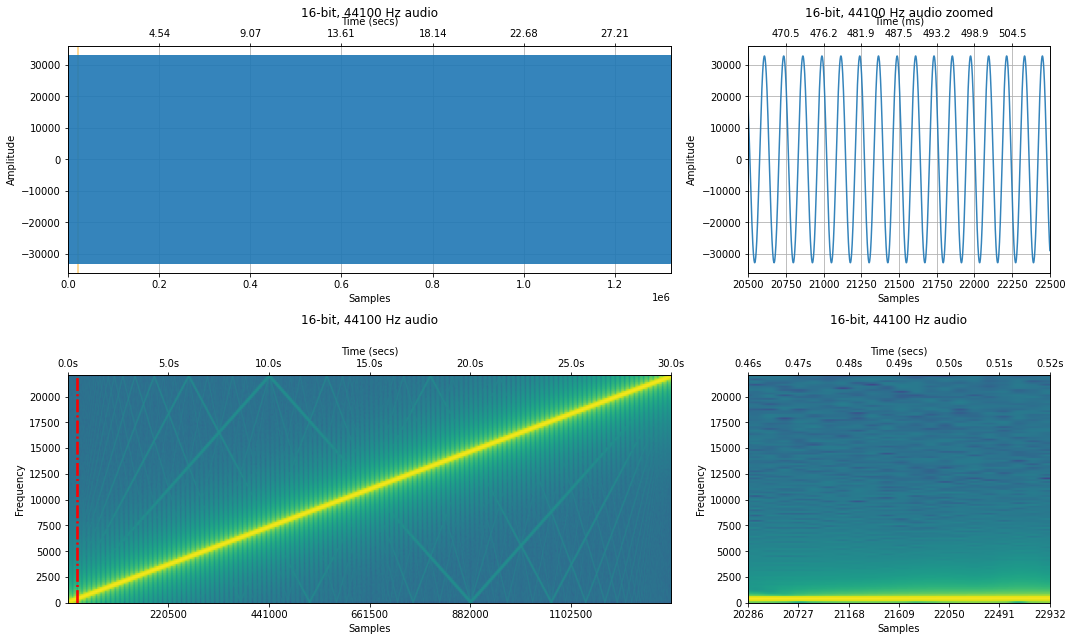

In [13]:
sampling_rate, freq_sweep_44100 = sp.io.wavfile.read('/content/sample2.wav')

quantization_bits = 16
print(f"{quantization_bits}-bit audio") 
print(f"Sampling rate: {sampling_rate} Hz")
print(f"Number of channels = {len(freq_sweep_44100.shape)}")
print(f"Total samples: {freq_sweep_44100.shape[0]}")

if len(freq_sweep_44100.shape) == 2:
    print("Converting stereo audio file to mono")
    freq_sweep_44100 = freq_sweep_44100.sum(axis=1) / 2

xlim_zoom = (20500, 22500)
signalpro.plot_signal_and_spectrogram(freq_sweep_44100, sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)
ipd.Audio(freq_sweep_44100, rate=sampling_rate)

### Same sweep but with a 11,025 Hz sampling rate

Sampling rate: 44100 Hz with Nyquist limit 22050 Hz
New sampling rate: 11025 Hz with Nyquist limit 5512 Hz


/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


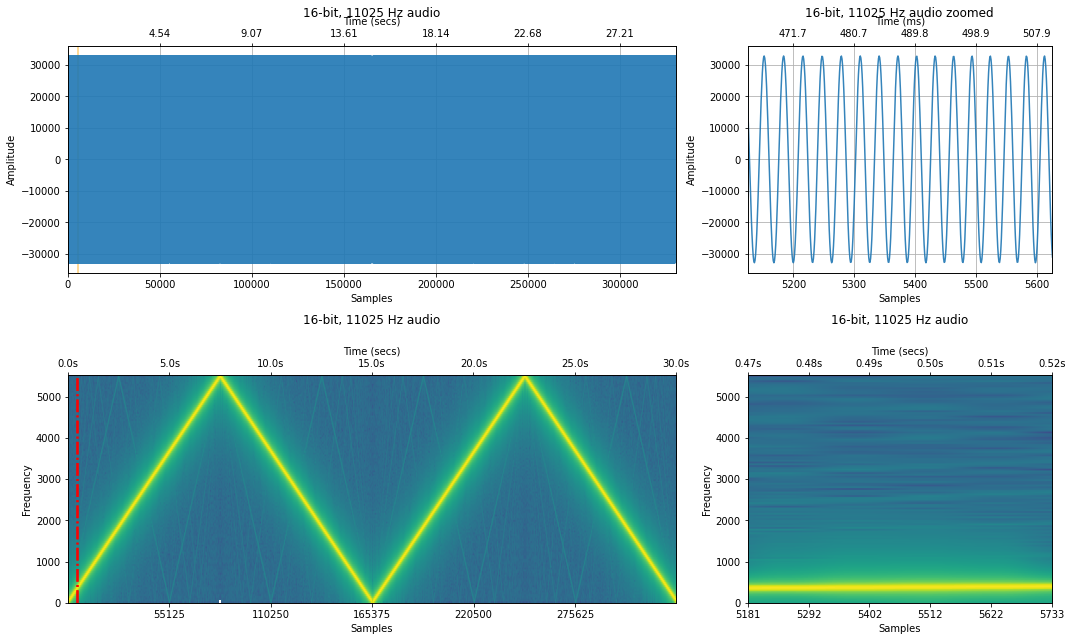

In [14]:
resample_factor = 4
new_sampling_rate = int(sampling_rate / resample_factor)
freq_sweep_11025 = freq_sweep_44100[::resample_factor]
resample_xlim_zoom = (xlim_zoom[0] / resample_factor, xlim_zoom[1] / resample_factor)
print(f"Sampling rate: {sampling_rate} Hz with Nyquist limit {int(sampling_rate / 2)} Hz")
print(f"New sampling rate: {new_sampling_rate} Hz with Nyquist limit {int(new_sampling_rate / 2)} Hz")

signalpro.plot_signal_and_spectrogram(freq_sweep_11025, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
ipd.Audio(freq_sweep_11025, rate=new_sampling_rate)

### Same sweep but with a 882 Hz sampling rate

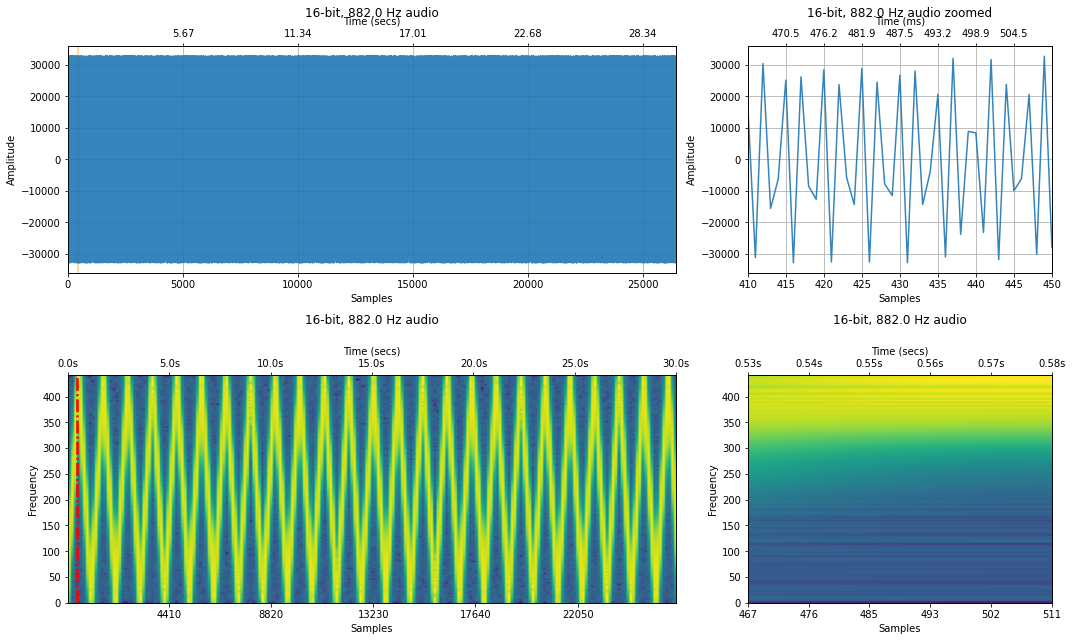

In [16]:
resample_factor = 50
new_sampling_rate = sampling_rate / resample_factor
freq_sweep_882 = freq_sweep_44100[::resample_factor]
resample_xlim_zoom = (xlim_zoom[0] / resample_factor, xlim_zoom[1] / resample_factor)

signalpro.plot_signal_and_spectrogram(freq_sweep_882, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
ipd.Audio(freq_sweep_882, rate=new_sampling_rate)

## Experimenting with a chord playing with frequencies from 261Hz to 4186Hz

### Sampled at 44,100Hz

Sampling rate: 44100 Hz
Number of channels = 1
Total samples: 88200


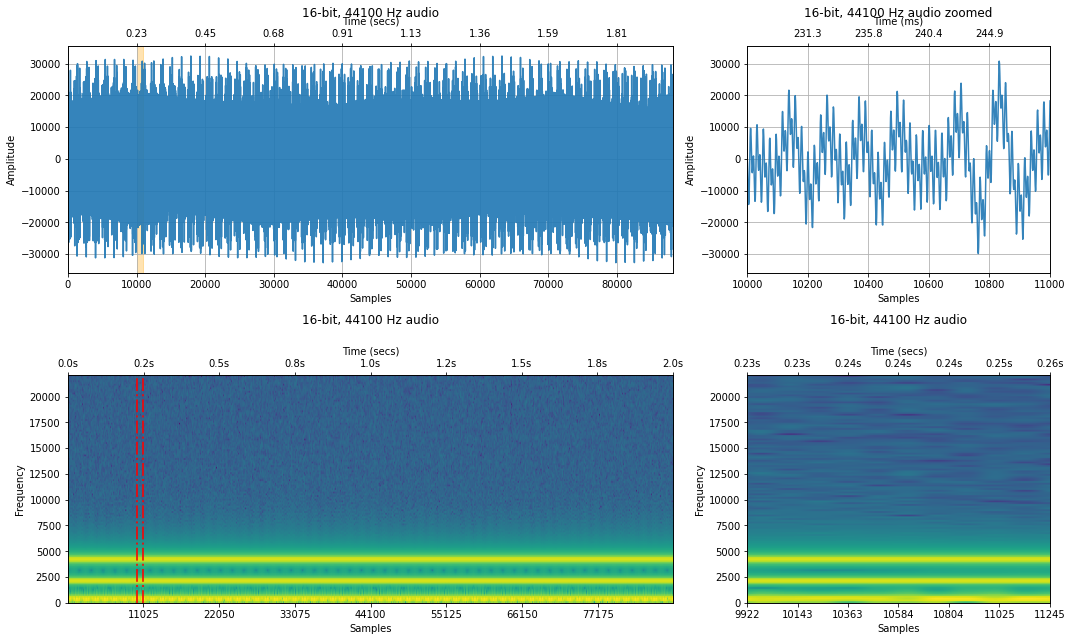

In [17]:
sinewavechord_soundfile = '/content/chord.wav'
sampling_rate, sine_wave_chord_44100 = sp.io.wavfile.read(sinewavechord_soundfile)


print(f"Sampling rate: {sampling_rate} Hz")
print(f"Number of channels = {len(sine_wave_chord_44100.shape)}")
print(f"Total samples: {sine_wave_chord_44100.shape[0]}")

if len(sine_wave_chord_44100.shape) == 2:
   
    print("Converting stereo audio file to mono")
    sine_wave_chord_44100 = sine_wave_chord_44100.sum(axis=1) / 2
    
quantization_bits = 16
xlim_zoom = (10000, 11000)
signalpro.plot_signal_and_spectrogram(sine_wave_chord_44100, sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)
ipd.Audio(sine_wave_chord_44100, rate=sampling_rate)

### Sampled at 11,025 Hz

Sampling rate: 44100 Hz with Nyquist limit 22050 Hz
New sampling rate: 11025 Hz with Nyquist limit 5512 Hz


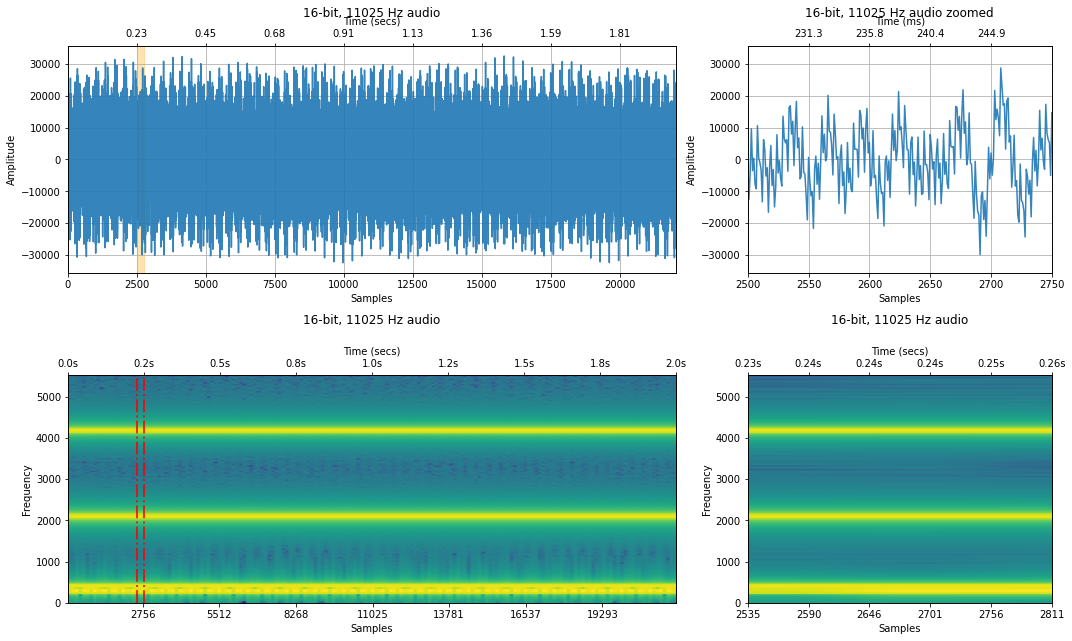

In [19]:
resample_factor = 4
new_sampling_rate = int(sampling_rate / resample_factor)
sine_wave_chord_11025 = sine_wave_chord_44100[::resample_factor]
resample_xlim_zoom = (xlim_zoom[0] / resample_factor, xlim_zoom[1] / resample_factor)
# plot_waveform(audio_data_11025, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
print(f"Sampling rate: {sampling_rate} Hz with Nyquist limit {int(sampling_rate / 2)} Hz")
print(f"New sampling rate: {new_sampling_rate} Hz with Nyquist limit {int(new_sampling_rate / 2)} Hz")

signalpro.plot_signal_and_spectrogram(sine_wave_chord_11025, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
ipd.Audio(sine_wave_chord_11025, rate=new_sampling_rate)

### Sampled at 4,410Hz

Sampling rate: 44100 Hz with Nyquist limit 22050 Hz
New sampling rate: 4410 Hz with Nyquist limit 2205 Hz


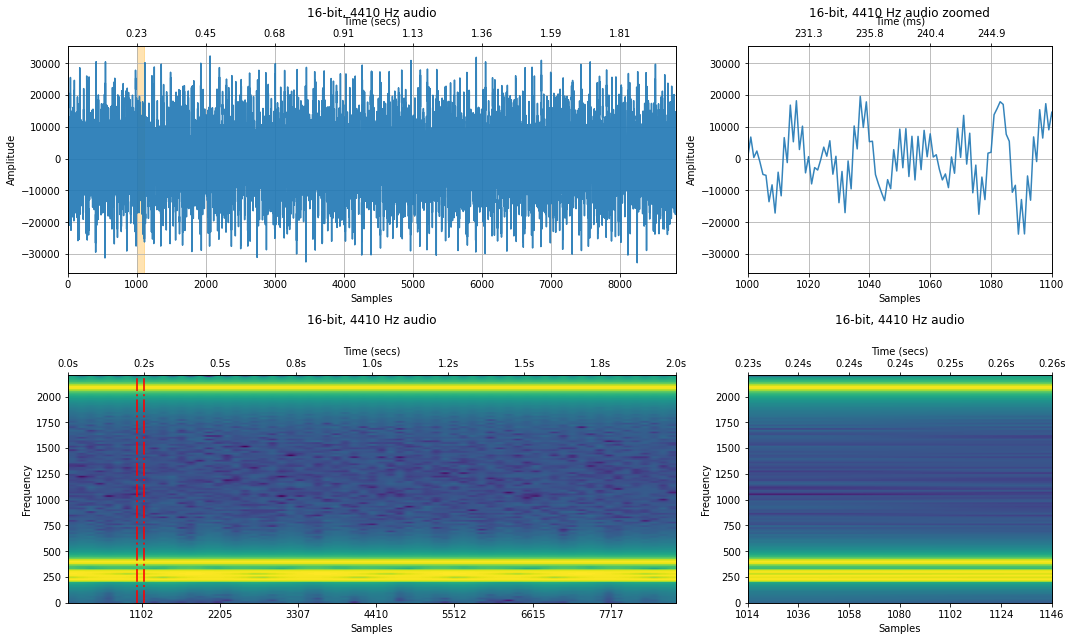

In [20]:
resample_factor = 10
new_sampling_rate = int(sampling_rate / resample_factor)
sine_wave_chord_4410 = sine_wave_chord_44100[::resample_factor]
resample_xlim_zoom = (xlim_zoom[0] / resample_factor, xlim_zoom[1] / resample_factor)

print(f"Sampling rate: {sampling_rate} Hz with Nyquist limit {int(sampling_rate / 2)} Hz")
print(f"New sampling rate: {new_sampling_rate} Hz with Nyquist limit {int(new_sampling_rate / 2)} Hz")

signalpro.plot_signal_and_spectrogram(sine_wave_chord_4410, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
ipd.Audio(sine_wave_chord_4410, rate=new_sampling_rate)